In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.shape

(1338, 7)

In [55]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [57]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [58]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

The smoker column is quite imbalanced as there are more non-smokers than smokers.

In [59]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [60]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Smokers pay more health insurance than non smokers. Which means smoking definitely affects the health of individuals that do hence they spend more.

In [62]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [63]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

There is really no significant mean difference between male and female, therefore the sex doesn't necessarily affect the health insurance charges.

In [64]:
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [65]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The correlations between the columns are really low.

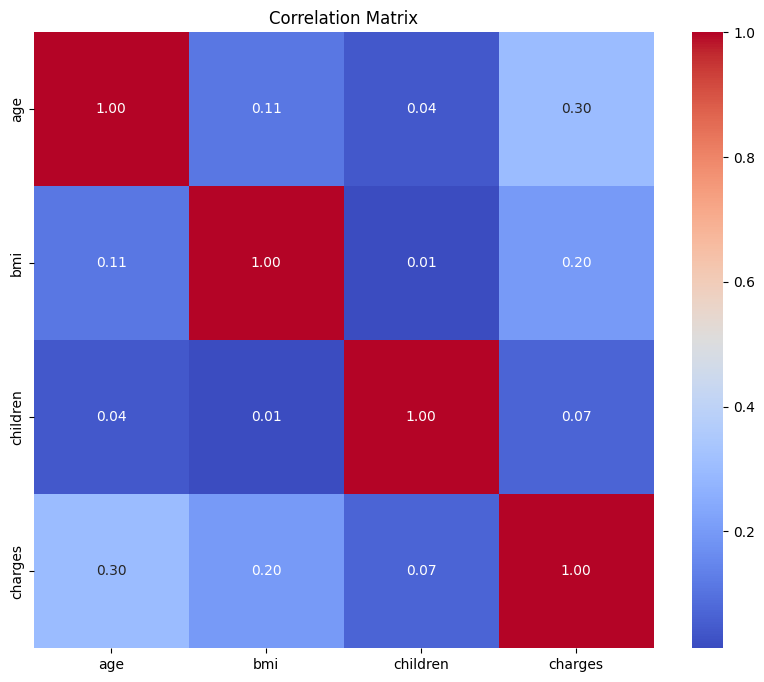

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

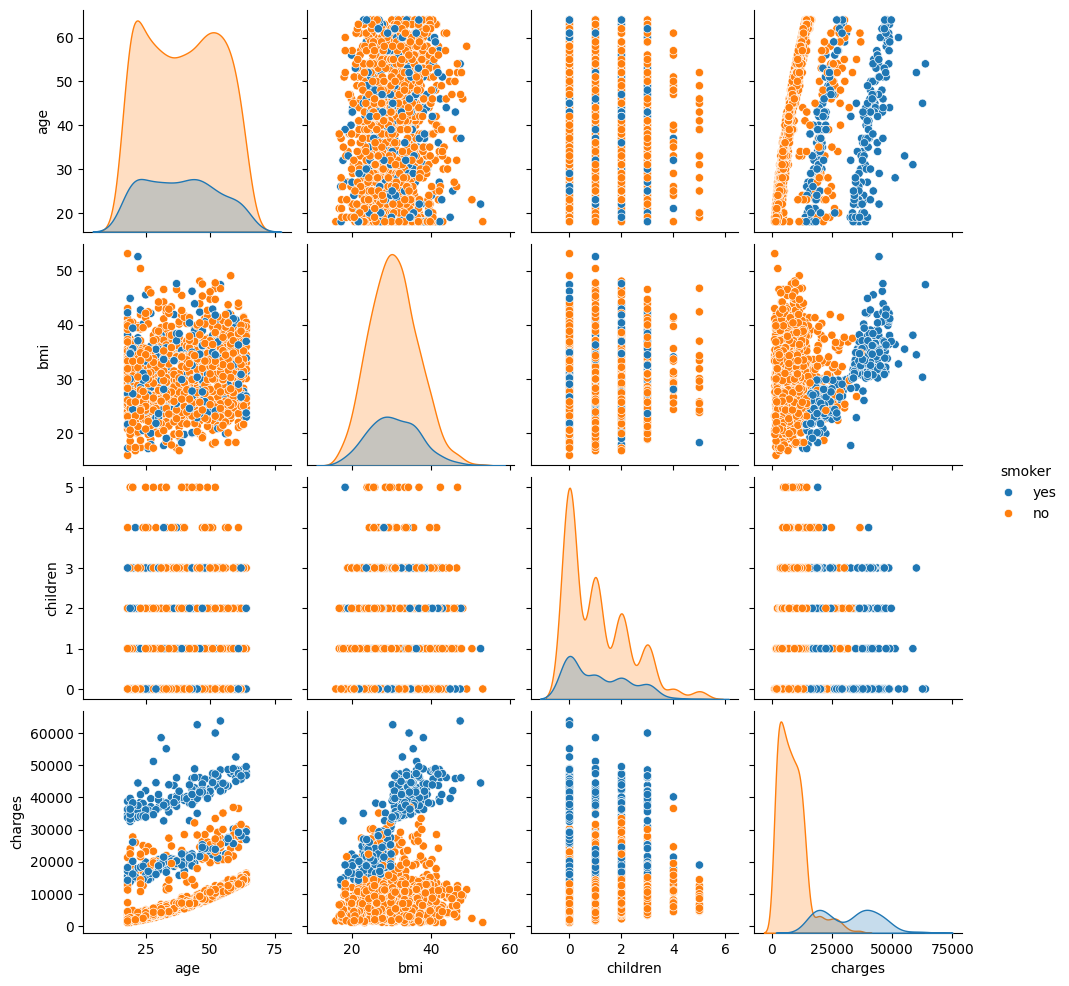

In [67]:
sns.pairplot(df, hue='smoker')  # 'smoker' is used for color-coding
plt.show()

**Insights based on Smokers**
1. Smoker Status Has a Major Impact on Charges
Strong separation between smokers and non-smokers in the charges vs. age and charges vs. bmi plots.

Smokers (blue dots) have significantly higher charges, often above $20,000.

Non-smokers (orange dots) mostly have charges below $15,000.

Interpretation: Smoking dramatically increases insurance charges, likely due to associated health risks.

2. Age Correlates with Charges
Positive trend in the age vs. charges plot.

As age increases, insurance charges tend to rise — particularly steep for smokers.

Interpretation: Older individuals are charged more, perhaps due to higher health risk.

3. BMI Shows a Mild Positive Correlation with Charges
bmi vs. charges shows an upward trend, though less steep than age.

Smokers with higher BMI incur some of the highest charges.

Interpretation: Higher BMI, especially when combined with smoking, increases risk — and charges.

4. Children Count Has Little Effect
children vs. charges shows no clear trend or strong correlation.

Interpretation: The number of children does not significantly affect individual insurance costs.

5. Density Distributions Vary for Smokers vs. Non-Smokers
charges distribution:

Non-smokers: Left-skewed, mostly < $15,000.

Smokers: Bimodal distribution with a high-density tail > $30,000.

bmi and age distributions also show slight shifts between the two groups.

6. Interactions
The most telling interactions are:

age x charges x smoker

bmi x charges x smoker


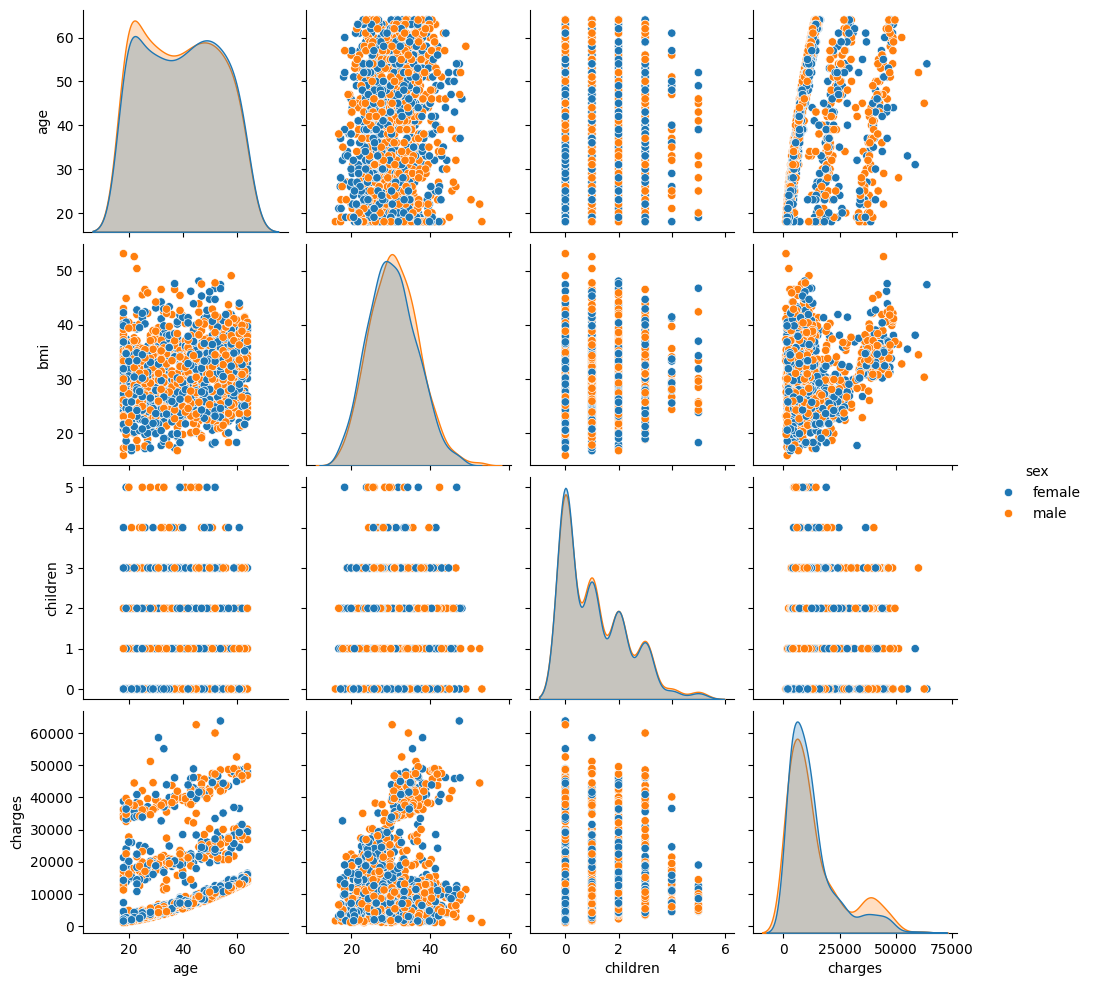

In [68]:
sns.pairplot(df, hue='sex')  # 'sex' is used for color-coding
plt.show()

**Insights based on Sex**
1. Sex Does Not Strongly Impact Charges
The charges distribution is very similar for both males and females, though males (orange) have a slightly heavier tail, indicating a few high-charge outliers.

The scatter plots (age vs. charges, bmi vs. charges) show no major visible separation by sex.

Interpretation: Sex has minimal impact on charges compared to smoking status, as seen in the previous plot.

2. Age Distribution Is Nearly Identical
Both male and female distributions of age are nearly overlapping.

Interpretation: The dataset is well-balanced by age for both sexes.

3. BMI Distribution Also Overlaps
There is no substantial difference in BMI distributions between male and female.

Interpretation: BMI alone is not significantly different across sexes.

4. Children Distribution Is Uniform
Both sexes appear equally distributed across the number of children.

Interpretation: Having children is not skewed toward either sex.

5. No Strong Sex-Based Trends in Feature Interactions
Across all feature pairings (age vs. bmi, bmi vs. children, etc.), the color spread is even.

Interpretation: Unlike smoking, sex is not a strong differentiator in this dataset in terms of its relationship with cost drivers.

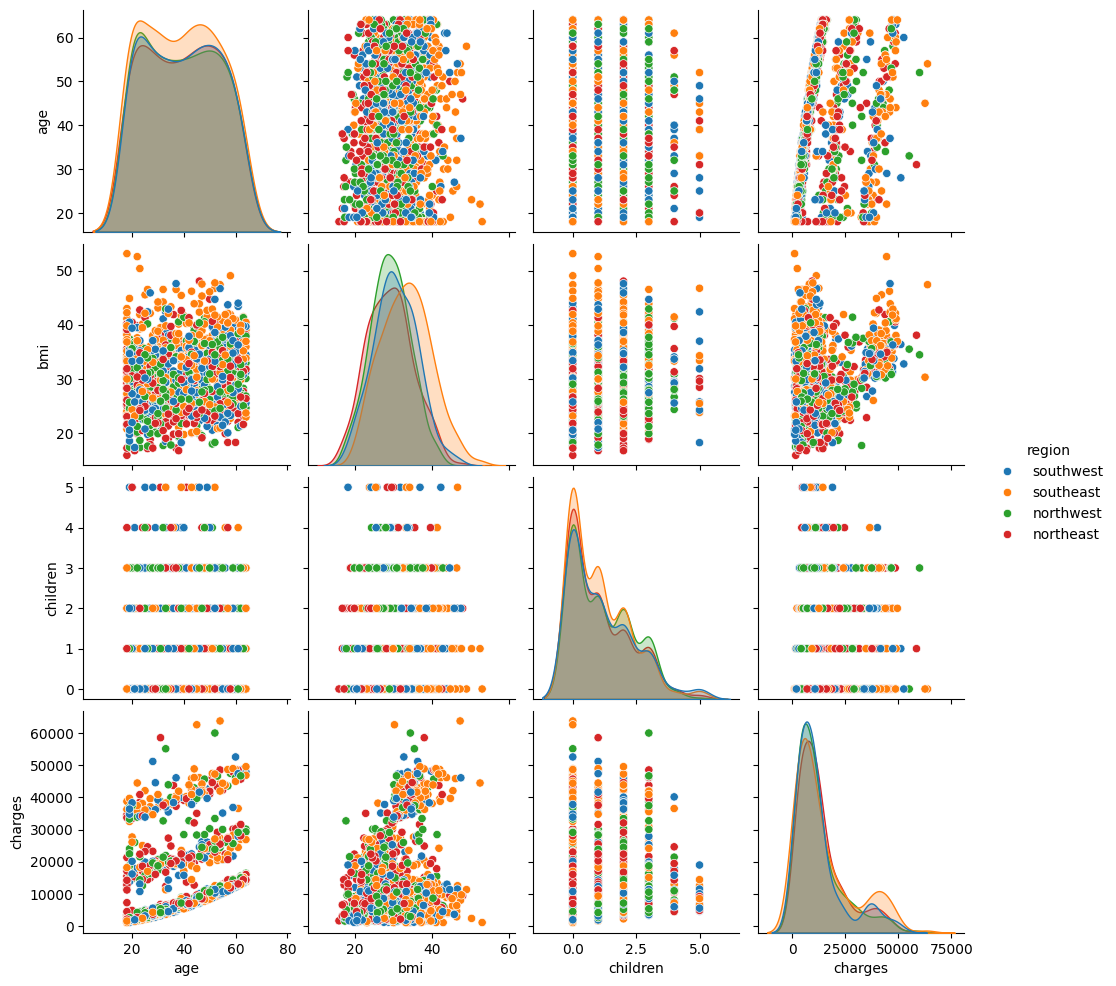

In [69]:
sns.pairplot(df, hue='region')  # 'region' is used for color-coding
plt.show()

**Insights based on Regions**
1. No Strong Regional Influence on Charges
The charges distribution (bottom-right) shows no significant regional differences—the KDE curves are closely overlapping for all regions.

Interpretation: Region is not a strong determinant of medical charges in this dataset.

2. Age, BMI, and Children Are Uniform Across Regions
All KDEs for age, bmi, and children are closely aligned across regions.

The scatter plots for age vs. bmi, bmi vs. children, etc., show a uniform color distribution—no region dominates any feature range.

Interpretation: The population is evenly distributed across regions for these features.

3. Slight Variation in BMI by Region
There is a slightly higher BMI density for individuals from the southeast (orange), though not substantial.

Interpretation: Southeast may have a slightly higher average BMI, but the difference is marginal.

4. Charges vs. Age and BMI Show Expected Relationships, Not Regional Trends
charges increase with age, and there's a noticeable rise with bmi in some cases, but not differentiated by region.

Interpretation: Age and BMI correlate with charges generally, but this is not region-dependent.

5. Children Feature Is Flat Across Regions
The number of children does not vary in any noticeable pattern across regions.

**FEATURE ENGINEERING AND SCALING**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X = df.drop('charges', axis=1)
y = df['charges']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Test-size, random_state, r2score
*   0.25, 42 = Mean Squared Error: 35117755.73613632,
R-squared: 0.7672642952734356,
Mean Absolute Error: 4243.654116653148,
*   0.25, 10 =Mean Squared Error: 38150907.33079195,
R-squared: 0.7162745306503484,
Mean Absolute Error: 4303.564911367611
*   0.3, 42 = Mean Squared Error: 33780509.57479167,
R-squared: 0.7696118054369009,
Mean Absolute Error: 4145.450555627603
*   0.3, 10 = Mean Squared Error: 36800107.88801565,
R-squared: 0.716612443233172,
Mean Absolute Error: 4226.647664219916
*   0.2, 42 = Mean Squared Error: 33596915.85136148
R-squared: 0.7835929767120722
Mean Absolute Error: 4181.194473753654
*   0.2, 10 = Mean Squared Error: 42730364.683872476,
R-squared: 0.6953286838318304,
Mean Absolute Error: 4555.098582513369







In [73]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


In [74]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [75]:
numerical_features = ['age', 'bmi', 'children']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [76]:
X_train

,age,sex,bmi,children,smoker,region
560,0.472227,female,-1.756525,0.734336,no,northwest
1285,0.543313,female,-1.033082,-0.911192,no,northeast
1142,0.898745,female,-0.943687,-0.911192,no,southeast
969,-0.025379,female,0.622393,3.202629,no,southeast
486,1.040918,female,-1.504893,1.557100,no,northwest
...,...,...,...,...,...,...
1095,-1.518194,female,0.130717,2.379865,no,northeast
1130,-0.025379,female,-1.107579,3.202629,no,southeast
1294,1.325264,male,-0.891539,-0.911192,no,northeast
860,-0.167551,female,2.820864,0.734336,yes,southwest


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Label encode 'sex' and 'smoker'
encoder_sex = LabelEncoder()
encoder_smoker = LabelEncoder()

X_train['sex'] = encoder_sex.fit_transform(X_train['sex'])
X_train['smoker'] = encoder_smoker.fit_transform(X_train['smoker'])

X_test['sex'] = encoder_sex.transform(X_test['sex'])
X_test['smoker'] = encoder_smoker.transform(X_test['smoker'])

# One-hot encode 'region'
# Define column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('region_ohe', OneHotEncoder(drop='first'), ['region'])  # drop='first' to avoid dummy variable trap
    ],
    remainder='passthrough'  # keep other columns as is
)

# Fit on training data and transform both train and test
X_train = pd.DataFrame(column_transformer.fit_transform(X_train), columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())


In [78]:
X_train

,region_ohe__region_northwest,region_ohe__region_southeast,region_ohe__region_southwest,remainder__age,remainder__sex,remainder__bmi,remainder__children,remainder__smoker
0,1.0,0.0,0.0,0.472227,0.0,-1.756525,0.734336,0.0
1,0.0,0.0,0.0,0.543313,0.0,-1.033082,-0.911192,0.0
2,0.0,1.0,0.0,0.898745,0.0,-0.943687,-0.911192,0.0
3,0.0,1.0,0.0,-0.025379,0.0,0.622393,3.202629,0.0
4,1.0,0.0,0.0,1.040918,0.0,-1.504893,1.557100,0.0
...,...,...,...,...,...,...,...,...
1065,0.0,0.0,0.0,-1.518194,0.0,0.130717,2.379865,0.0
1066,0.0,1.0,0.0,-0.025379,0.0,-1.107579,3.202629,0.0
1067,0.0,0.0,0.0,1.325264,1.0,-0.891539,-0.911192,0.0
1068,0.0,0.0,1.0,-0.167551,0.0,2.820864,0.734336,1.0


**MODEL TRAINING**

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [80]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = linear.predict(X_test)

In [82]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 33596915.85136146
R-squared: 0.7835929767120723
Mean Absolute Error: 4181.194473753649


**HYPERPARAMETER TUNING**

Polynomial Regression

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [84]:
poly = PolynomialFeatures(degree=2, include_bias =True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [85]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred_poly = regression.predict(X_test_poly)

In [86]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_poly))
print('R-squared:', r2_score(y_test, y_pred_poly))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_poly))

Mean Squared Error: 20712805.987918366
R-squared: 0.8665830903164841
Mean Absolute Error: 2729.5001336394484


Ridge regression

In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [89]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('R-squared:', r2_score(y_test, y_pred_ridge))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_ridge))

Mean Squared Error: 33645393.49385556
R-squared: 0.7832807188145148
Mean Absolute Error: 4193.19535293527


Lasso regression

In [90]:
from sklearn.linear_model import Lasso

In [91]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [92]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('R-squared:', r2_score(y_test, y_pred_lasso))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso))

Mean Squared Error: 33605708.716766745
R-squared: 0.7835363394350988
Mean Absolute Error: 4182.221101744538


ElasticNet regression

In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
elasticnet = ElasticNet(alpha=1.0)
elasticnet.fit(X_train, y_train)
y_pred_elasticnet = elasticnet.predict(X_test)

In [95]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elasticnet))
print('R-squared:', r2_score(y_test, y_pred_elasticnet))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elasticnet))

Mean Squared Error: 94113596.69210443
R-squared: 0.39378830482043947
Mean Absolute Error: 7538.308343415197


K-Fold Cross Validation

In [96]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Define categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Create preprocessing pipelines for both numerical and categorical data
numerical_pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline1 = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # sparse=False for compatibility with LinearRegression
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline1, numerical_features),
        ('cat', categorical_pipeline1, categorical_features),
    ])

# Create the final pipeline with preprocessing and model
pipeline1 = Pipeline([
    ('preprocessor', preprocessor1),
    ('model', LinearRegression())
])

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation and calculate negative MSE
scores = cross_val_score(pipeline1, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert to RMSE
rmse_scores = np.sqrt(-scores)

# Print results
print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Cross-validated RMSE scores: [5796.28465928 6118.79238299 5783.73260581 6446.65123205 6240.67372458]
Mean RMSE: 6077.226920941315
Standard deviation: 256.8985536349911


In [97]:
scores = cross_val_score(pipeline1, X, y, cv=kf, scoring='r2')  # Change scoring to 'r2'

# Print results
print("Cross-validated R-squared scores:", scores)
print("Mean R-squared:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validated R-squared scores: [0.78359298 0.7380458  0.79558615 0.63243806 0.75131533]
Mean R-squared: 0.7401956629640443
Standard deviation: 0.057777855592366506


**Insights on the models**
The polynomial regression model is so far the most accurate and will be the model I'll use for the final system.

Linear & Polynomial Regression Hyperparameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [99]:
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])


In [100]:
param_grid = {
    'poly__degree': [1, 2, 3],
    'poly__include_bias': [False],
    'poly__interaction_only': [False, True],
    'regressor__fit_intercept': [True, False],
    # 'regressor__normalize': [False]  # normalize is deprecated in newer versions, usually False
}


In [101]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3],
                         'poly__include_bias': [False],
                         'poly__interaction_only': [False, True],
                         'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [102]:
grid_search.best_params_

{'poly__degree': 2,
 'poly__include_bias': False,
 'poly__interaction_only': False,
 'regressor__fit_intercept': True}

In [103]:
grid_search.best_score_

np.float64(-24447591.144814946)

In [104]:
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

In [105]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_grid))
print('R-squared:', r2_score(y_test, y_pred_grid))

Mean Squared Error: 20712805.987918355
R-squared: 0.8665830903164841


Lasso & Polynomial Hyperparameter Tuning

In [106]:
# Lasso pipeline
lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lasso', Lasso(max_iter=10000))
])

# Parameter grid for Lasso
lasso_param_grid = {
    'poly__degree': [1, 2, 3],
    'lasso__alpha': [0.01, 0.1, 1, 10],  # Regularization strength
}

# Grid search for Lasso
lasso_grid = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
lasso_grid.fit(X_train, y_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Lasso CV Score (Negative MSE):", lasso_grid.best_score_)

# Best Lasso model
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Lasso Parameters: {'lasso__alpha': 10, 'poly__degree': 2}
Best Lasso CV Score (Negative MSE): -24338732.518952295


In [107]:
print('Mean Squared Error:', mean_squared_error(y_test, lasso_pred))
print('R-squared:', r2_score(y_test, lasso_pred))

Mean Squared Error: 20343050.44105741
R-squared: 0.8689647880173799


In [108]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge(max_iter=10000))  # Changed to Ridge
])

# Parameter grid for Ridge
ridge_param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.01, 0.1, 1, 10],  # Regularization strength (same as Lasso)
}

# Grid search for Ridge
ridge_grid = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
ridge_grid.fit(X_train, y_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Ridge CV Score (Negative MSE):", ridge_grid.best_score_)

# Best Ridge model
best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Ridge Parameters: {'poly__degree': 2, 'ridge__alpha': 1}
Best Ridge CV Score (Negative MSE): -24431312.497521605


In [109]:
print('Mean Squared Error:', mean_squared_error(y_test, ridge_pred))
print('R-squared:', r2_score(y_test, ridge_pred))

Mean Squared Error: 20704629.42212213
R-squared: 0.8666357578372919


Elasticnet parameter tuning

In [110]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# ElasticNet pipeline
elasticnet_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('elasticnet', ElasticNet(max_iter=10000))  # Changed to ElasticNet
])

# Parameter grid for ElasticNet
elasticnet_param_grid = {
    'poly__degree': [1, 2, 3],
    'elasticnet__alpha': [0.01, 0.1, 1, 10],  # Regularization strength
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9]  # L1 ratio (mix between L1 and L2 penalties)
}

# Grid search for ElasticNet
elasticnet_grid = GridSearchCV(elasticnet_pipeline, elasticnet_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
elasticnet_grid.fit(X_train, y_train)

print("Best ElasticNet Parameters:", elasticnet_grid.best_params_)
print("Best ElasticNet CV Score (Negative MSE):", elasticnet_grid.best_score_)

# Best ElasticNet model
best_elasticnet = elasticnet_grid.best_estimator_
elasticnet_pred = best_elasticnet.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ElasticNet Parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.9, 'poly__degree': 2}
Best ElasticNet CV Score (Negative MSE): -24432304.652012993


In [111]:
print('Mean Squared Error:', mean_squared_error(y_test, elasticnet_pred))
print('R-squared:', r2_score(y_test, elasticnet_pred))

Mean Squared Error: 20704033.07808615
R-squared: 0.8666395990540945


The Lasso x Polynomial regression is the best and most accurate model.

In [112]:
import pickle

model_objects = {
    'scaler': scaler,
    'encoder_sex': encoder_sex,
    'encoder_smoker': encoder_smoker,
    'column_transformer': column_transformer,
    'best_lasso': best_lasso  # Or best_ridge, best_elasticnet, etc.
}

# Save the dictionary to a pickle file
with open('insurance_model.pkl', 'wb') as file:
    pickle.dump(model_objects, file)

In [113]:
age = float(input("Enter age: "))
sex = input("Enter sex (male/female): ")
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = input("Enter smoker status (yes/no): ")
region = input("Enter region (southwest/southeast/northwest/northeast): ")

# Create DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'bmi': [bmi],
    'children': [children],
    'smoker': [smoker],
    'region': [region]
})

# Encode categorical variables
input_df['sex'] = encoder_sex.transform(input_df['sex'])
input_df['smoker'] = encoder_smoker.transform(input_df['smoker'])

# Scale numerical features
numerical_features = ['age', 'bmi', 'children']
input_df[numerical_features] = scaler.transform(input_df[numerical_features])

# One-hot encode region
input_df = pd.DataFrame(column_transformer.transform(input_df), columns=column_transformer.get_feature_names_out())

prediction = best_lasso.predict(input_df)
print("Predicted insurance charges:", prediction[0])

Predicted insurance charges: 33583.72515169697
